# Hamilton equation of motion

***

- Principle of least action
- Fundamentalize Hamiltonian with Hamilton equations of motion
- Poisson bracket
- Stationary states

The Hamilton equations of motion derive from a yet more fundamental law of physics -- the principle of least action. This states that a trajectory is physical if and only of it minimizes the action.

The (hybrid) action of a point particle in an electromagnetic field is given as (Landau & Lifschitz, Jackson, Zwiebach)

\begin{equation}
S = -mc\int_\Lambda d\tau\,\sqrt{-\eta_{\mu\nu} \frac{dx^\mu}{d\tau}\frac{dx^\nu}{d\tau}}
    + \frac{q}{c}\int_\Lambda d\tau\,\frac{dx_\mu}{d\tau} A^\mu
    - \frac{1}{16\pi c}\int_\Theta d^{4}x\,F_{\mu\nu}F^{\mu\nu}.
\end{equation}

The principle of least action requires that

\begin{equation}
\delta S = 0.
\end{equation}

By means of the action we can extract the Lagriangian. Appyling the priciple of least action we obtain the Lagrange equations of motion. We will not embark into these further. Instead, we will proceed directly in applying a Legendre transform to the Lagrangian in order to obtain a set of truly independent canonically conjugate variables. The Legendre transformation will yield the Hamiltonian which will be a function of these conanically conjugate variables -- the generalized coordinates and their canonically conjugate momenta. Applying, again, the principle of least action we finally obtain the Hamilton equations of motion. These exhibit the symplectic structure of classical mechanics.

Instead of originating from the principle of least action, one can instead just postulate the symplectic structure of classical mechanics and the Hamilton equation so motion. One can then invent any Hamiltonian and derive the phycial equations of motion. The coordinates my be akward, though. If we denote the space of generalized coordnates $\vec{q}$ and canonically conjugate momenta $\vec{p}$ as $\Gamma$, such that

$$
\begin{pmatrix}
\vec{q} \\ \vec{p}
\end{pmatrix} \in \Gamma \subset \mathbb{R}^{2n},
$$

we can formally write down the Hamiltonian and the Hamilton equations of motion

$$
H \in f: \Gamma\rightarrow\mathbb{R},\quad H = H(\vec{p},\vec{q};t),\quad
    \dot{q_i} =  \frac{\partial H}{\partial p_i},\quad
    \dot{p_i} = -\frac{\partial H}{\partial q_i}
$$

We can now study the time evoultion of a function
$$
F \in f: \Gamma\rightarrow\mathbb{R},\quad F = F(\vec{p},\vec{q};t)
$$
which becomes
\begin{equation}
\begin{aligned}
\frac{d}{dt} F &= \sum_i \frac{\partial F}{\partial q_i}\dot{q_i} + \frac{\partial F}{\partial p_i}\dot{p_i} + \frac{\partial F}{\partial t}\\
    &= \sum_i \frac{\partial F}{\partial q_i}\frac{\partial H}{\partial p_i}
     - \frac{\partial F}{\partial p_i}\frac{\partial H}{\partial q_i} + \frac{\partial F}{\partial t}\\
    & = [F,H] + \frac{\partial F}{\partial t}
\end{aligned}
\end{equation}

With $F,G \in f:\Gamma\rightarrow\mathbb{R}$, we define the Poisson bracket as
$$
[F,G] = \sum_i \frac{\partial F}{\partial q_i}\frac{\partial G}{\partial p_i}
    - \frac{\partial F}{\partial p_i}\frac{\partial G}{\partial q_i}
$$

If we define
$$
:H:\equiv [H,\cdot],
$$
we can write finite time evolutions of these functions as
$$
F(t) = e^{-:H:t} F(t_0)
$$

Now we find trivially that a function is stationary if it can be written as a function of the Hamiltonian itself $\psi = \psi(H)$
$$
\frac{d}{dt}\psi(H) = -[H,\psi(H)] = 0
$$

# So how do we build it?

***

Synchrotron motion is generated by the Hamiltonian

\begin{equation}
H(z,\delta) = -\frac{1}{2}\eta\beta c\,\delta^2 + \frac{e V}{2\pi h p_0} \left(
    \cos\left(\frac{h z}{R}\right) - \cos\left(\frac{h z_c}{R}\right)
    + \frac{\Delta E}{eV} \left(\frac{h z}{R} - \frac{h z_c}{R}\right)
    \right)
\end{equation}

We want a function that is stationary under synchrotron motion. Hence, we need a function

\begin{equation}
\psi = \psi(H).
\end{equation}

We will choose and exponential of the form

\begin{equation}
\psi(H) = \exp\left(H/H_0\right).
\end{equation}

Given the Hamiltonain and the distribution function above we can now generate a 2d macroparticle distribution usig a simple MC rejection method.

In [1]:
from sympy import pi
from sympy import init_session, init_printing
from sympy.integrals.trigonometry import trigintegrate

init_session()
init_printing()

IPython console for SymPy 1.0 (Python 2.7.9-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [2]:
C, R, E, V                = symbols('C, R, E, V', real=True, positive=True)
c, e, pi, zs, zu          = symbols('c, e, pi, z_s, z_u', real=True, positive=True)
h, p0                     = symbols('h, p_0', real=True, positive=True)
alpha, beta, gamma, eta   = symbols('alpha beta gamma eta', real=True, positive=True)
z, delta                  = symbols('z, delta', real=True, positive=True)

In [3]:
def Vf(z):
    return e*V/(p0*C) * (
        R/h*cos(h*z/R) - R/h*cos(h*zs/R) + (z-zs)*sin(h*zs/R))

# def Vf(z):
#     return e*V/(p0*C) * (
#         R/h*cos(h*z/R) - R/h*cos(h*zs/R))

def Hf(Vf):
    def f(z, delta):
        return (-1/2 * eta*beta*c*delta**2 + Vf(z))
    return f

H = Hf(Vf)

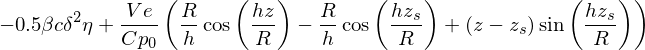

In [4]:
H(z, delta)

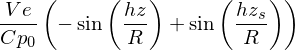

In [5]:
H(z,delta).diff(z)

In [6]:

series(H(z, delta), x=z, x0=zs, n=3)

                 2    ⎛h⋅z_s⎞                                        
  V⋅e⋅h⋅(z - z_s) ⋅cos⎜─────⎟                                        
                      ⎝  R  ⎠            2      ⎛         3         ⎞
- ─────────────────────────── - 0.5⋅β⋅c⋅δ ⋅η + O⎝(z - z_s) ; z → z_s⎠
            2⋅C⋅R⋅p₀                                                 

## Beta gammas

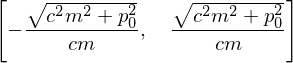

In [10]:
def beta(gamma):
    return sqrt(1 - gamma**-2)

simplify(solve(p0 - m*gamma*beta(gamma)*c, gamma))

# NumPy evaluations

In [11]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.constants import e, c, m_p

import curve_tools as cv

/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Field and voltage functions

In [12]:
def get_zsfp_and_zufp(f):

    phi_stable = 0
    # This does not work as counting will be violated for large accelerations
    zz = np.linspace(phi_stable - 1.1*zmax, phi_stable + 1.1*zmax) 
    # Safer
    zz = np.linspace(phi_stable - 1.5*zmax, phi_stable + 1.5*zmax) 
    z0 = np.atleast_1d(cv.zero_crossings(f, zz))[0]
    
    z0odd = z0[1::2]
    z0even = z0[::2]
    
    if len(z0) == 1:
        return z0, z0
    
    if eta*dp > 0:
        z_sfp, z_ufp = z0odd, z0even
    else:
        z_sfp, z_ufp = z0even, z0odd
        
    return z_sfp, z_ufp


def zufp_separatrix(f):

    z_sfp, z_ufp = get_zsfp_and_zufp(f)
    
    if eta*dp > 0:
        return z_ufp[-1]
    else:
        return z_ufp[0]
    

def H0_for_sigma(sigma_z):
    return sigma_z * np.sqrt(e*V*h/(2*np.pi*p0*R**2))


def H0_for_emittance():
    return sigma_z * np.sqrt(e*V*h/(2*np.pi*p0*R**2))

In [13]:
def efield(V, h, dphi, dp=0):
    def f(z):
        return e/(p0*C) * reduce(
            lambda x, y: x+y, [V[i]*np.sin(h[i]*z/R + dphi[i]) for i in xrange(len(V))]) - dp*beta*c/C
    return f

def voltage(V, h, dphi, dp=0, ef=None):
    def vf(z):
        return e/(p0*C) * reduce(
            lambda x, y: x+y, [R/h[i] * V[i]*np.cos(h[i]*z/R + dphi[i]) for i in xrange(len(V))])

    if dp:
        zmax = zufp_separatrix(ef)

        def f(z):
            return vf(z) - vf(zmax) + dp*beta*c/C * (z - zmax)
        return f

    else:
        return vf

def hamiltonian_f(vf):
    def f(z, dp):
        return -1/2*eta*beta*c*dp**2 + vf(z)
    return f

def eqH(vf, Hc):
    def f(z):
        return np.sqrt(( 2./(eta*beta*c) * (vf(z) - Hc)))

    return f

## Plot & play

In [14]:
%matplotlib tk

In [15]:
# Machine
C      = 6911.
R      = C/(2*np.pi)

p0     = 26e9 * e/c
gamma  = (1 + (p0/(m_p*c))**2)

alpha  = 1/18**2
eta    = alpha - 1/gamma**2
V      = [4e6, -20e5]
h      = [4620, 18480]
dphi   = [0, 0]

# Acceleration
beta          = np.sqrt(1-1/gamma**2)
T0            = C/(beta*c)
normalisation = 1/C * e/p0 * T0
dp            = 2e6 * normalisation

In [16]:
zmax   = C/min(h)/2.
zz = np.linspace(-1.2*zmax, 1.2*zmax, 1000)
pp = np.linspace(-5e-3, 5e-3, 1000)
ZZ, PP = np.meshgrid(zz, pp)

ef = efield(V, h, dphi, dp)
vf = voltage(V, h, dphi, dp, ef)
hamiltonian = hamiltonian_f(vf)
hh = hamiltonian(ZZ, PP)
hc = eqH(vf, 0)

zsfp, zufp = get_zsfp_and_zufp(ef)
z0 = np.array([z for z in zsfp] + [z for z in zufp])

In [17]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,14), sharex=True)

ax1.plot(zz, ef(zz))
ax1.plot(z0, 0*z0, 'o')
ax1.axhline(0, c='k', lw=1)
[ax1.axvline(z, c='y') for z in z0]
ax1.set_ylabel('E [eV/m/p0]')

ax2.plot(zz, -vf(zz))
ax2.axhline(0, c='k', lw=1)
[ax2.axvline(z, c='y') for z in z0]
ax2.set_ylabel('-V [eV/p0]')

ax3.plot(z0, 0*z0, 'o')
ax3.plot(zz, +hc(zz), c='orange', lw=3)
ax3.plot(zz, -hc(zz), c='orange', lw=3)
ax3.contour(ZZ, PP, hh, 20, cmap=plt.cm.viridis_r)
ax3.set_xlabel('z [m]')
ax3.set_ylabel('$\delta$', fontsize=20)

plt.show()
plt.close('all')

# [ax.axhline(0, c='r', ls='--', lw=2) for ax in [ax1, ax2]]
# [ax.axvline(p, c=cl, ls='--', lw=2) for p, cl in zip(ap, ac) for ax in [ax1, ax2]]
# [ax1.plot(p, Es(p), '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
# [ax2.plot(p, -Vs(p), '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
# [ax3.plot(p, 0, '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
# # [ax3.annotate(t, (p,0), (-40, -70), textcoords='offset points', color=cl, fontsize=22,
# #               bbox=dict(boxstyle="round", fc="1"),
# #               arrowprops=dict(arrowstyle="fancy",
# #                               fc="0.6", ec="none",
# #                               connectionstyle="angle3,angleA=0,angleB=-90")) for t, p, cl in zip(at, ap, ac)]
# ax3.plot(ap[1], hc(ap[1]), 'x', c='r', ms=8, mew=2)

In [18]:
def psi_f(H, H0):
    def f(x, y):
        return np.exp(H(x, y).clip(min=0)/H0)
        
    return f

In [19]:
psi = psi_f(hamiltonian, 1e3)
ff = psi(ZZ, PP)

In [20]:
fig1, (ax1, ax2) = plt.subplots(2, figsize=(16,10), sharex=True)

ax1.plot(z0, 0*z0, 'o')
ax1.contour(ZZ, PP, hh.clip(min=0), 20, cmap=plt.cm.viridis_r)
ax1.contour(ZZ, PP, hh.clip(min=0), levels=[0], colors='orange')
ax1.set_xlabel('z [m]')
ax1.set_ylabel('$\delta$', fontsize=20)

ax2.plot(z0, 0*z0, 'o')
ax2.contour(ZZ, PP, ff, 100, cmap=plt.cm.viridis_r)
ax2.contour(ZZ, PP, ff, levels=[0], colors='orange')
ax2.set_xlabel('z [m]')
ax2.set_ylabel('$\delta$', fontsize=20)
ax2.set_xlim(-0.4*zmax, 1.2*zmax)

plt.show()

In [17]:
ap = []
at = ['$z_u$', '$z_s$', '$z_r$']
ac = ['b', 'orange', 'b']
try:
    ap.append(vx0[0])
except IndexError:
    ap.append(ex0[0])
ap.append(zs)
ap.append(ex0[-1])
ap.append(np.pi-zs)

NameError: name 'vx0' is not defined

In [ ]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10), sharex=True)

ax1.plot(zz, ea(zz), 'g', lw=2);
ax1.set_ylabel('E [eV/m/p0]')
ax1.grid()

ax2.plot(zz, -va(zz), 'brown', lw=2);
ax2.set_ylabel('-V [eV/p0]')
ax2.grid()

ax3.contour(ZZ, PP, hh, 40);
ax3.contour(ZZ, PP, hh, levels=[0]);
ax3.plot(zz, +hc(zz), c='purple', lw=2);
ax3.plot(zz, -hc(zz), c='purple', lw=2);
ax3.set_xlabel('z [m]')
ax3.set_ylabel('$\delta$', fontsize=20)

[ax.axhline(0, c='r', ls='--', lw=2) for ax in [ax1, ax2]]
[ax.axvline(p, c=cl, ls='--', lw=2) for p, cl in zip(ap, ac) for ax in [ax1, ax2]]
[ax1.plot(p, Es(p), '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
[ax2.plot(p, -Vs(p), '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
[ax3.plot(p, 0, '*', c=cl, ms=8) for p, cl in zip(ap, ac)]
# [ax3.annotate(t, (p,0), (-40, -70), textcoords='offset points', color=cl, fontsize=22,
#               bbox=dict(boxstyle="round", fc="1"),
#               arrowprops=dict(arrowstyle="fancy",
#                               fc="0.6", ec="none",
#                               connectionstyle="angle3,angleA=0,angleB=-90")) for t, p, cl in zip(at, ap, ac)]
ax3.plot(ap[1], hc(ap[1]), 'x', c='r', ms=8, mew=2)
# ax3.annotate(r'$\delta_{max}$', (ap[1], hc(ap[1])), (50, 25), textcoords='offset points', color='r', fontsize=22,
#              bbox=dict(boxstyle="round", fc="1"),
#              arrowprops=dict(arrowstyle="fancy",
#                              fc="0.6", ec="none",
#                              connectionstyle="angle3,angleA=0,angleB=-90"))

plt.tight_layout()
# plt.savefig('bucket_multiple_accelerating.png', dpi=300)
# plt.savefig('bucket_accelerating.png', dpi=200)
plt.show()